# Introduccion
En el presente notebook se realizaron analisis preliminares de los datos junto con el procesamiento de los mismos, esto incluye:
1.   analisis introductorio de datos
2.   analisis y visualizacion principales datos
3.   procesamiento de Señales y reduccion de ruido




#Analisis exploratorio de datos


El estudio "Mental Emotional Sentiment Classification with an EEG-based Brain-Machine Interface" utiliza un dispositivo EEG (Electroencefalografía) comercial, específicamente la diadema MUSE, para capturar datos de ondas cerebrales. El dispositivo cuenta con cuatro electrodos: TP9, AF7, AF8 y TP10, que miden microvoltios de actividad cerebral. El objetivo del estudio es clasificar experiencias emocionales basadas en estos datos de EEG.

La adquisición de datos se realizó mediante la grabación de actividades cerebrales de dos sujetos (un hombre y una mujer de entre 20 y 22 años) durante la visualización de clips de películas diseñados para evocar emociones positivas, negativas y neutras. Cada sesión de grabación duró un minuto por clip, resultando en un total de 36 minutos de datos EEG (6 minutos por cada estado emocional).


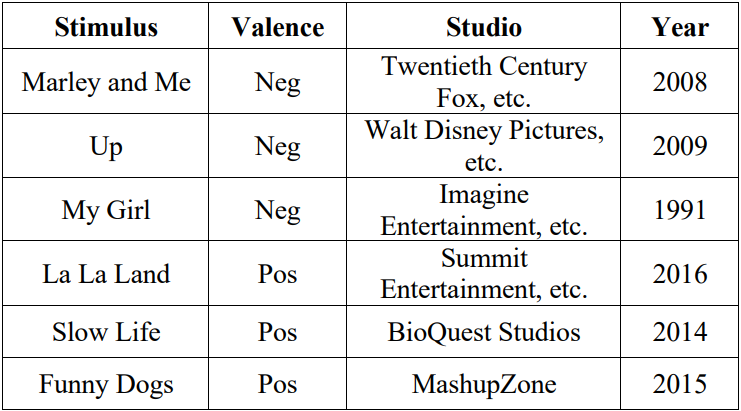

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#importamos las librerias esenciales
import numpy as np
import pandas as pd
#usaremos PDA para el analisis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Mounted at /content/drive


Las señales fueron procesadas, llevandonos a lo siguiente:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DatasetEEG/EEG Brainwave Dataset: Feeling Emotions/emotions.csv")
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


Pero vamos a revisar la fuente con la que se logro llegar a esto.

La herramienta que se uso para la toma de datos fue la diadema MUSE y se conectaron los electrodos en los canales:
*   TP9 - Temporal posterior izquierdo (Intermedio entre el lobulo temporal y parietal).
*   TP10 - Temporal posterior derecho (Intermedio entre el lobulo temporal y parietal).
*   AF7- Frontal anterior izquierdo (Intermedio entre el lobulo frontal y la corteza prefrontal).
*   AF8- Frontal anterior derecho (Intermedio entre el lobulo frontal y la corteza prefrontal)

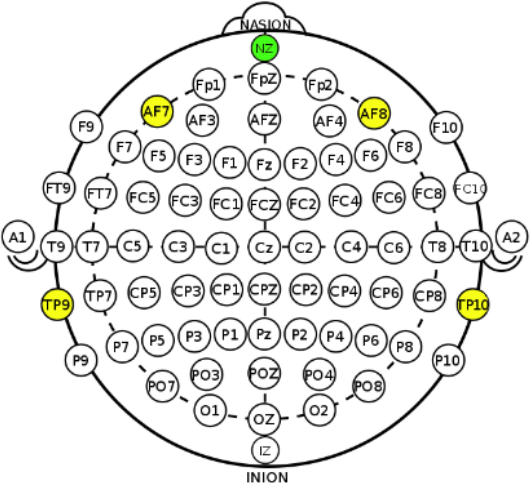



Las emociones estan segmentadas de la siguiente forma, por las categorías de Lövheim y sus emociones encapsuladas con una etiqueta de valencia:

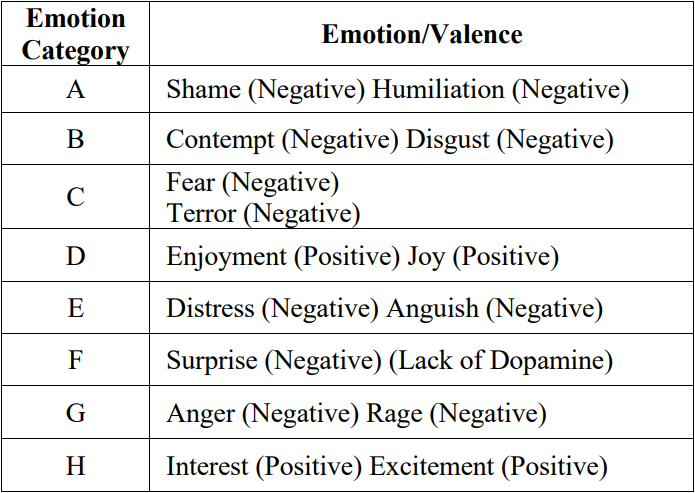

**Clasificación y Funcionamiento del Experimento** <br>
Para clasificar los estados emocionales, se emplearon métodos de extracción estadística de las ondas cerebrales alfa, beta, theta, delta y gamma. Estos datos se redujeron a conjuntos de datos más pequeños mediante la selección de características utilizando métodos como OneR, Red Bayesiana, Ganancia de Información e Incertidumbre Simétrica. De las 2548 características iniciales, un subconjunto de 63 características seleccionadas por sus valores de Ganancia de Información resultaron ser las mejores para los clasificadores en conjunto como el Bosque Aleatorio.

El experimento se realizó de la siguiente manera: <br>
1. Grabación de Datos: Se grabaron los datos EEG de los sujetos mientras veían clips de películas para evocar estados emocionales específicos.
2. Preprocesamiento de Datos: Los datos se muestrearon a una frecuencia de 150 Hz, obteniendo un total de 324,000 puntos de datos.
3. Extracción de Características: Se extrajeron características estadísticas de las ondas cerebrales dentro de ventanas de tiempo específicas.
4. Selección de Características: Se seleccionaron las características más relevantes utilizando métodos estadísticos.
5. Clasificación: Se emplearon varios algoritmos de clasificación, incluidos modelos individuales y de conjunto, para predecir los estados emocionales.

# Analisis y visualizacion de componentes de principales datos
En esta sección
En esta seccion se realiza un analisis a los datos de tal forma que se destaquen aquellos canales que brinden informacion relevante al mismo tiempo que una descripcion de los estados de los mismos

In [ ]:
from google.colab import drive
drive.mount("/mnt/drive")
#importamos las librerias esenciales
import numpy as np
import pandas as pd
#usaremos PDA para el analisis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Mounted at /mnt/drive


Es importante mencionar que los datos que estamos usando para la visualización no son los datos del estudio que trata la clasificacion de emociones a partir de ondas cerebrales, sino un estudio similar (http://dx.doi.org/10.1109/IS.2018.8710576) que clasifica los estados mentales mientras los sujetos realizan tareas a partir de ondas cerebrales EEG realizado por el mismo autor que nos permite ver cómo se ven los datos sin procesar de las ondas cerebrales EEG.


Text(0.5, 0.98, 'Sujeto A en estado de concentración')

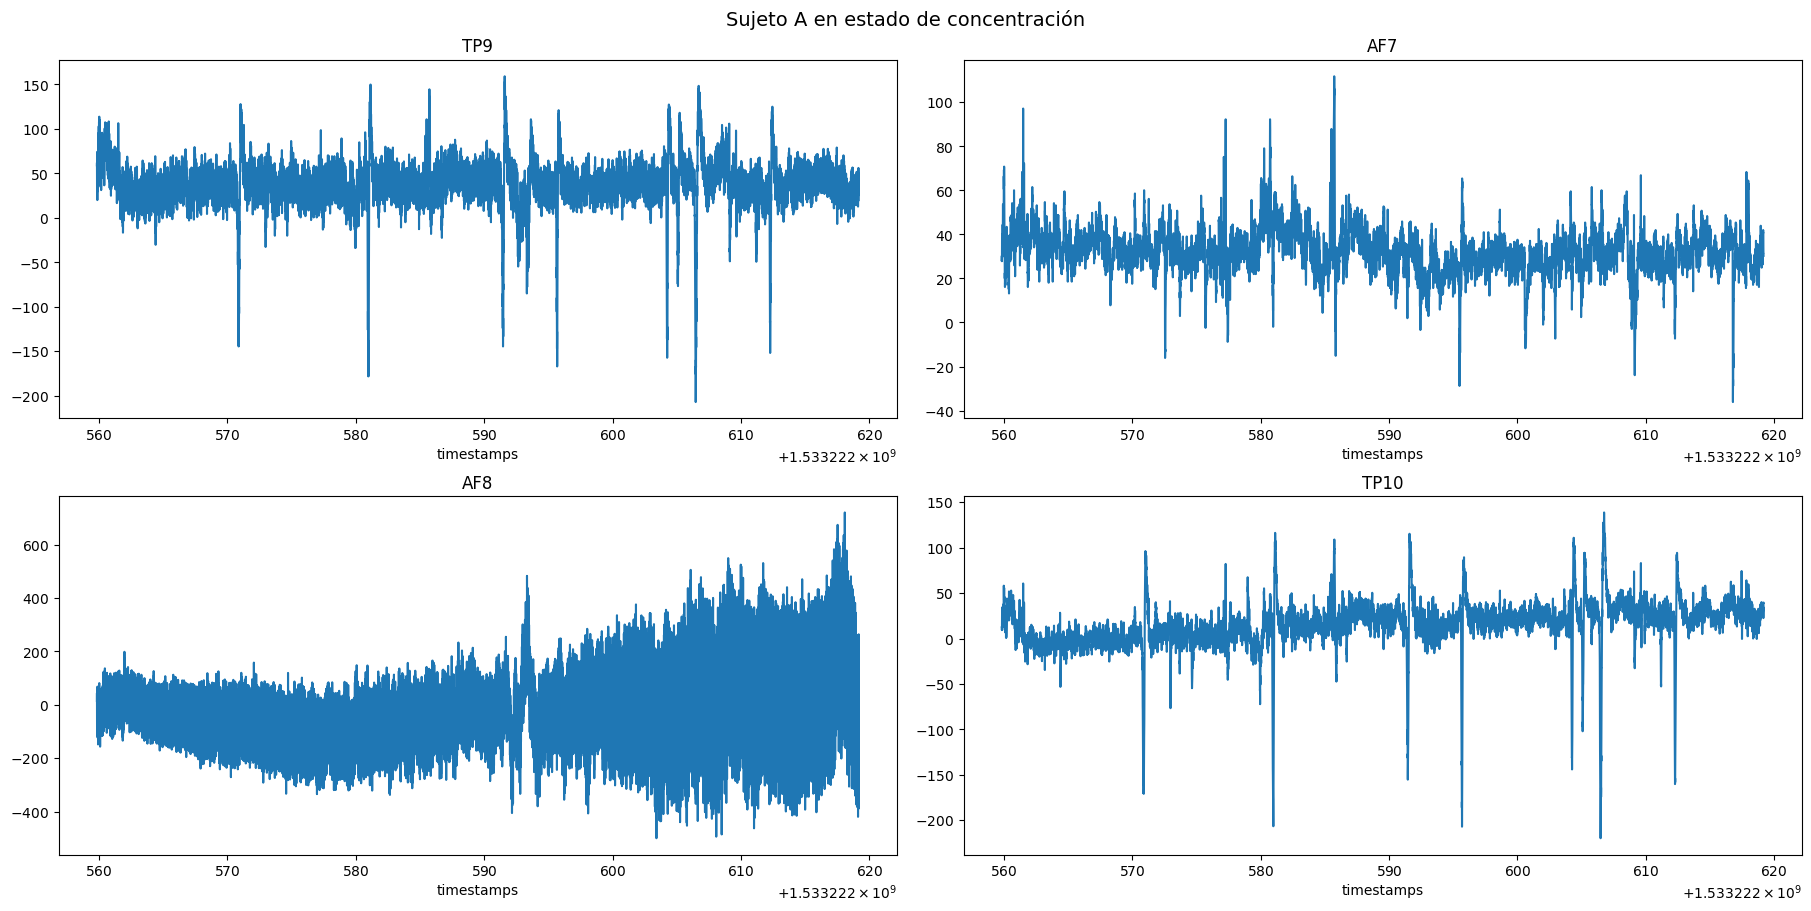

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjecta-concentrating-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto A en estado de concentración", fontsize=14)

Text(0.5, 0.98, 'Sujeto B en estado de concentración')

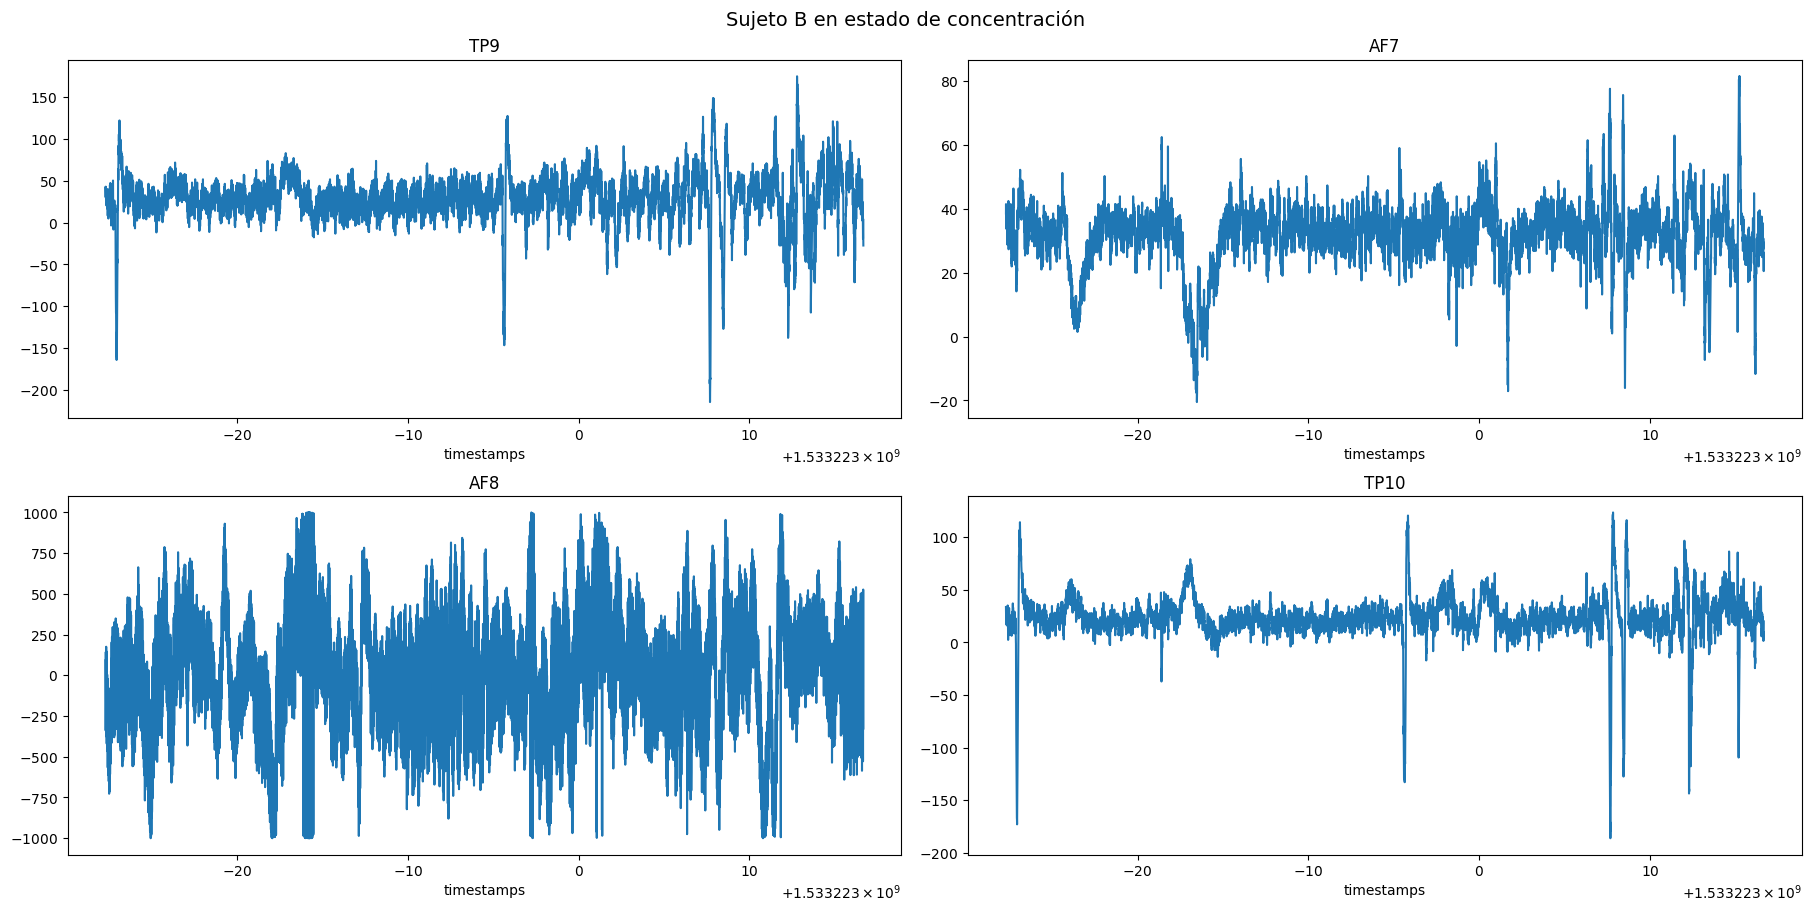

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectb-concentrating-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto B en estado de concentración", fontsize=14)

Text(0.5, 0.98, 'Sujeto C en estado de concentración')

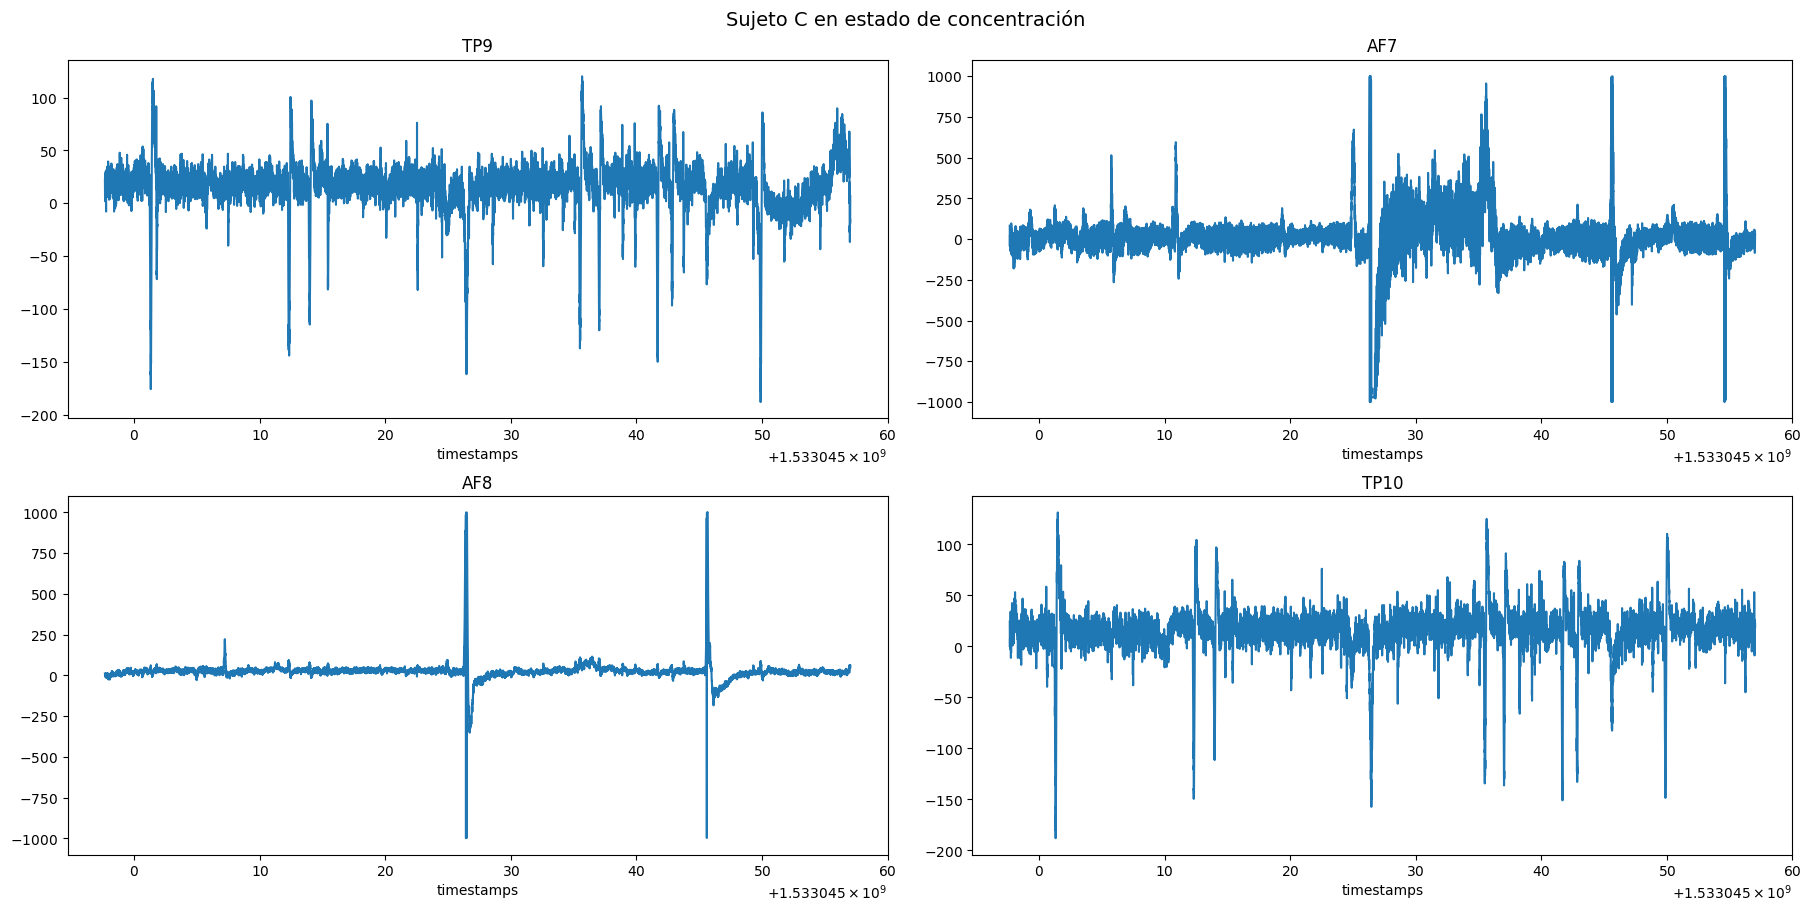

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectc-concentrating-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto C en estado de concentración", fontsize=14)

Text(0.5, 0.98, 'Sujeto D en estado de concentración')

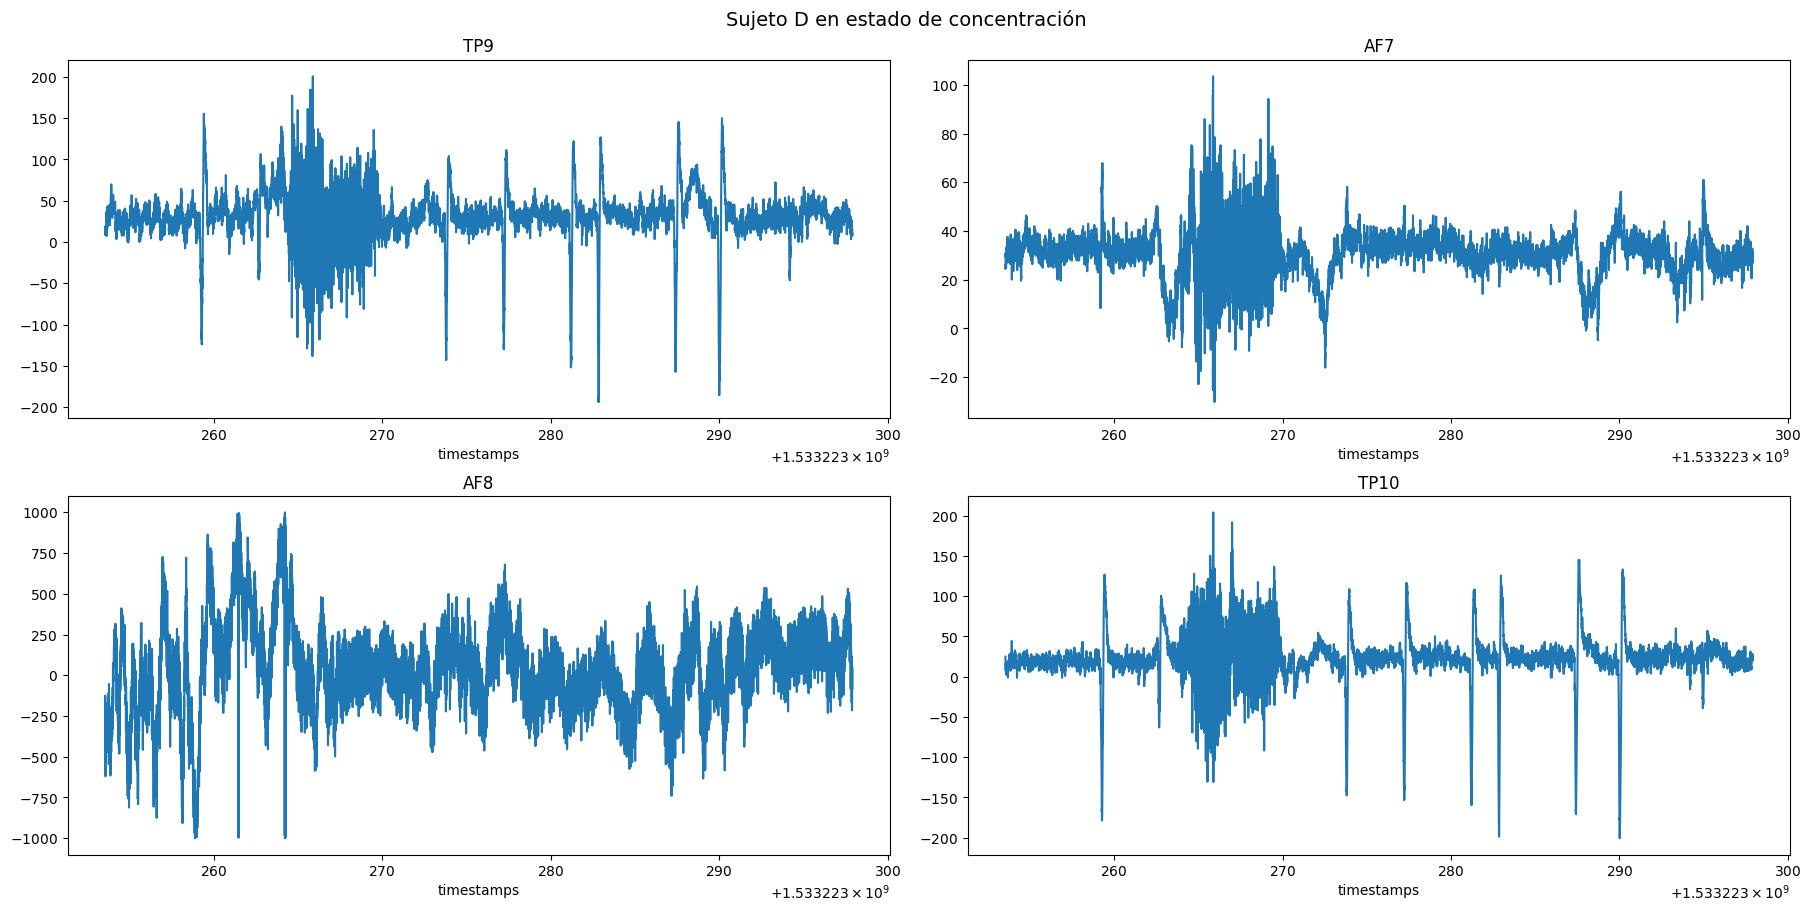

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectd-concentrating-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto D en estado de concentración", fontsize=14)

Text(0.5, 0.98, 'Sujeto A en estado neutral')

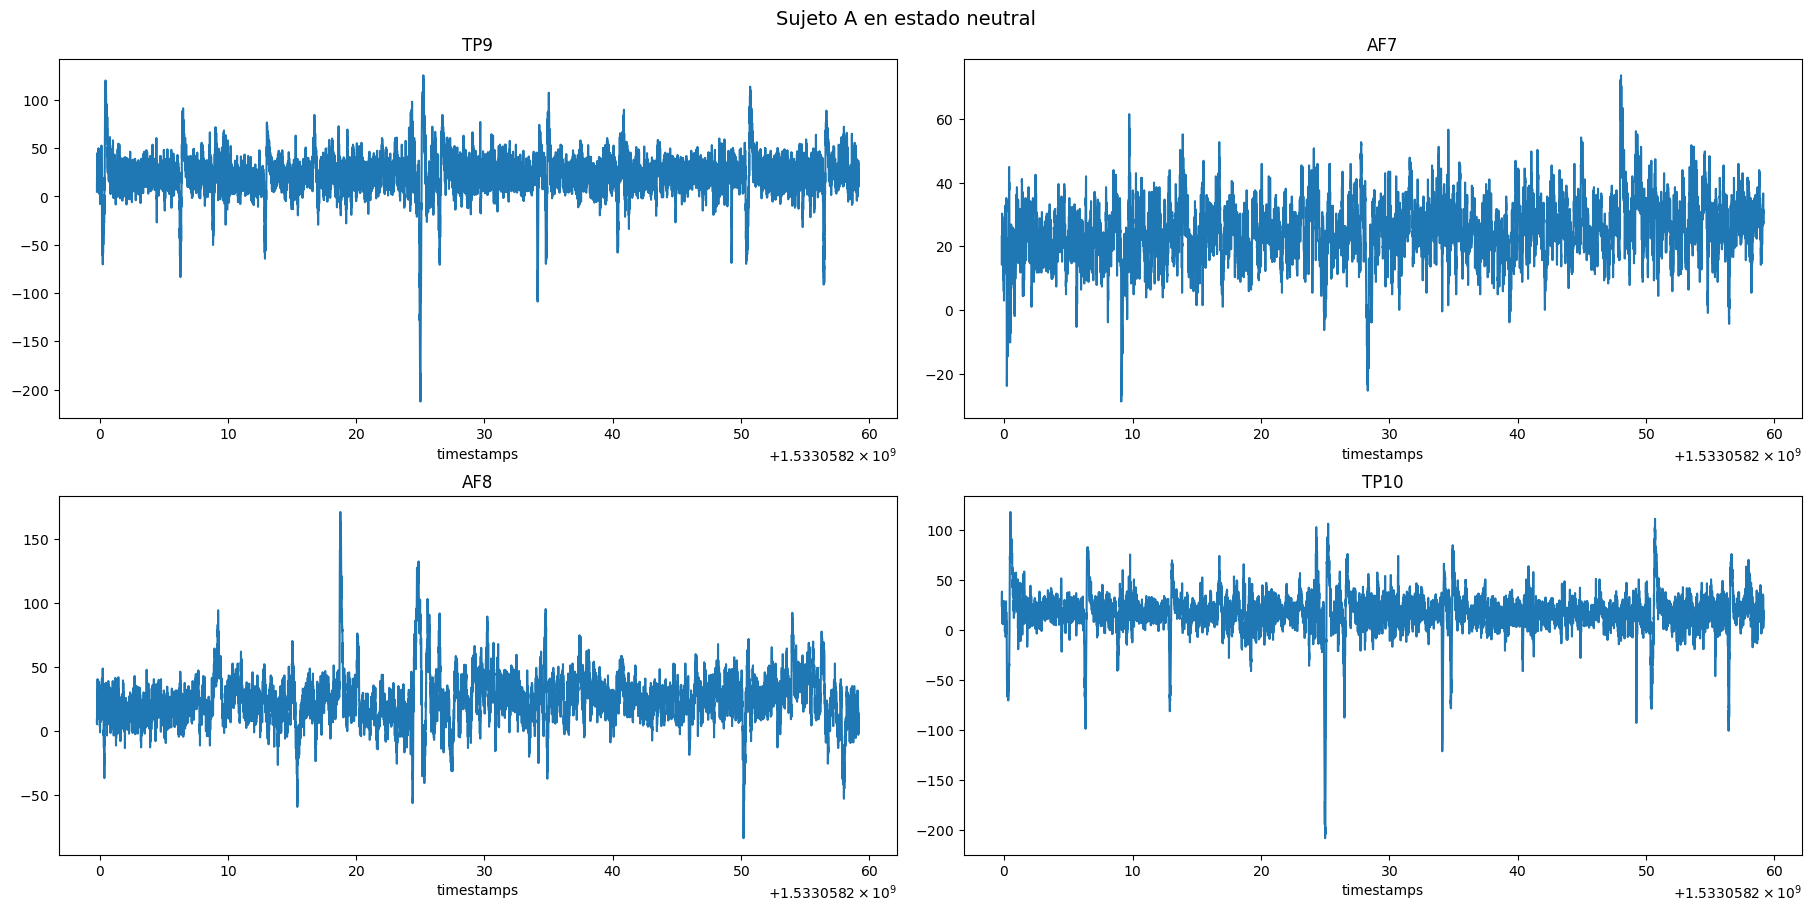

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjecta-neutral-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto A en estado neutral", fontsize=14)

Text(0.5, 0.98, 'Sujeto B en estado neutral')

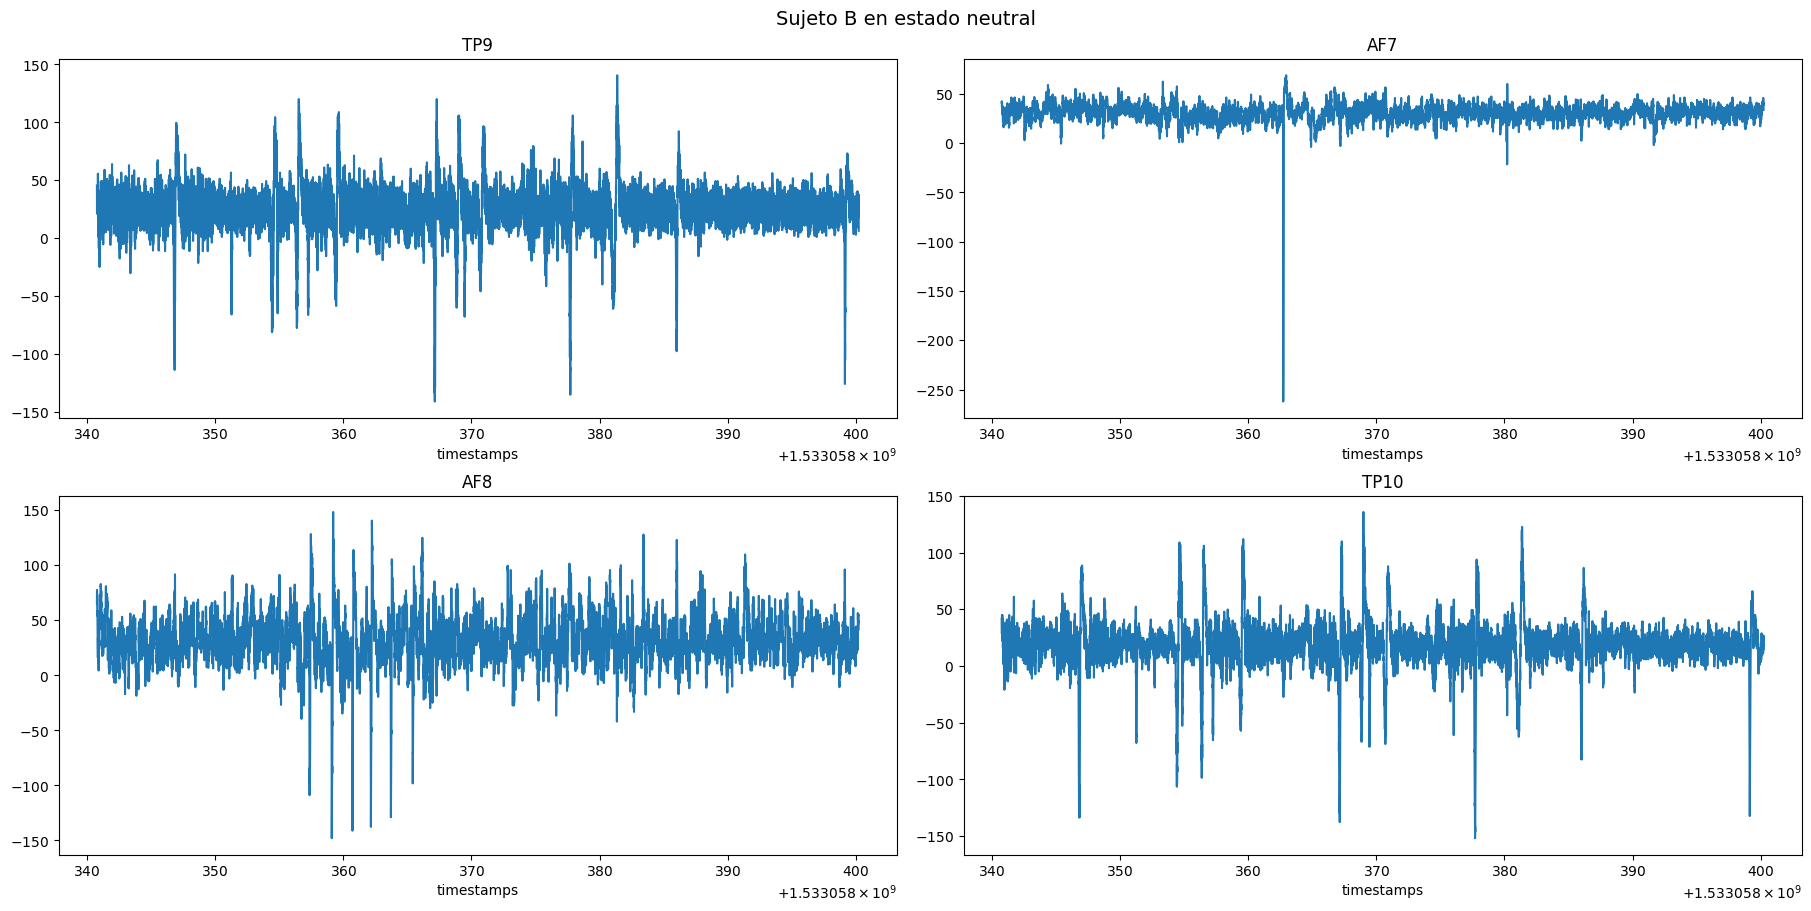

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectb-neutral-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto B en estado neutral", fontsize=14)

Text(0.5, 0.98, 'Sujeto C en estado neutral')

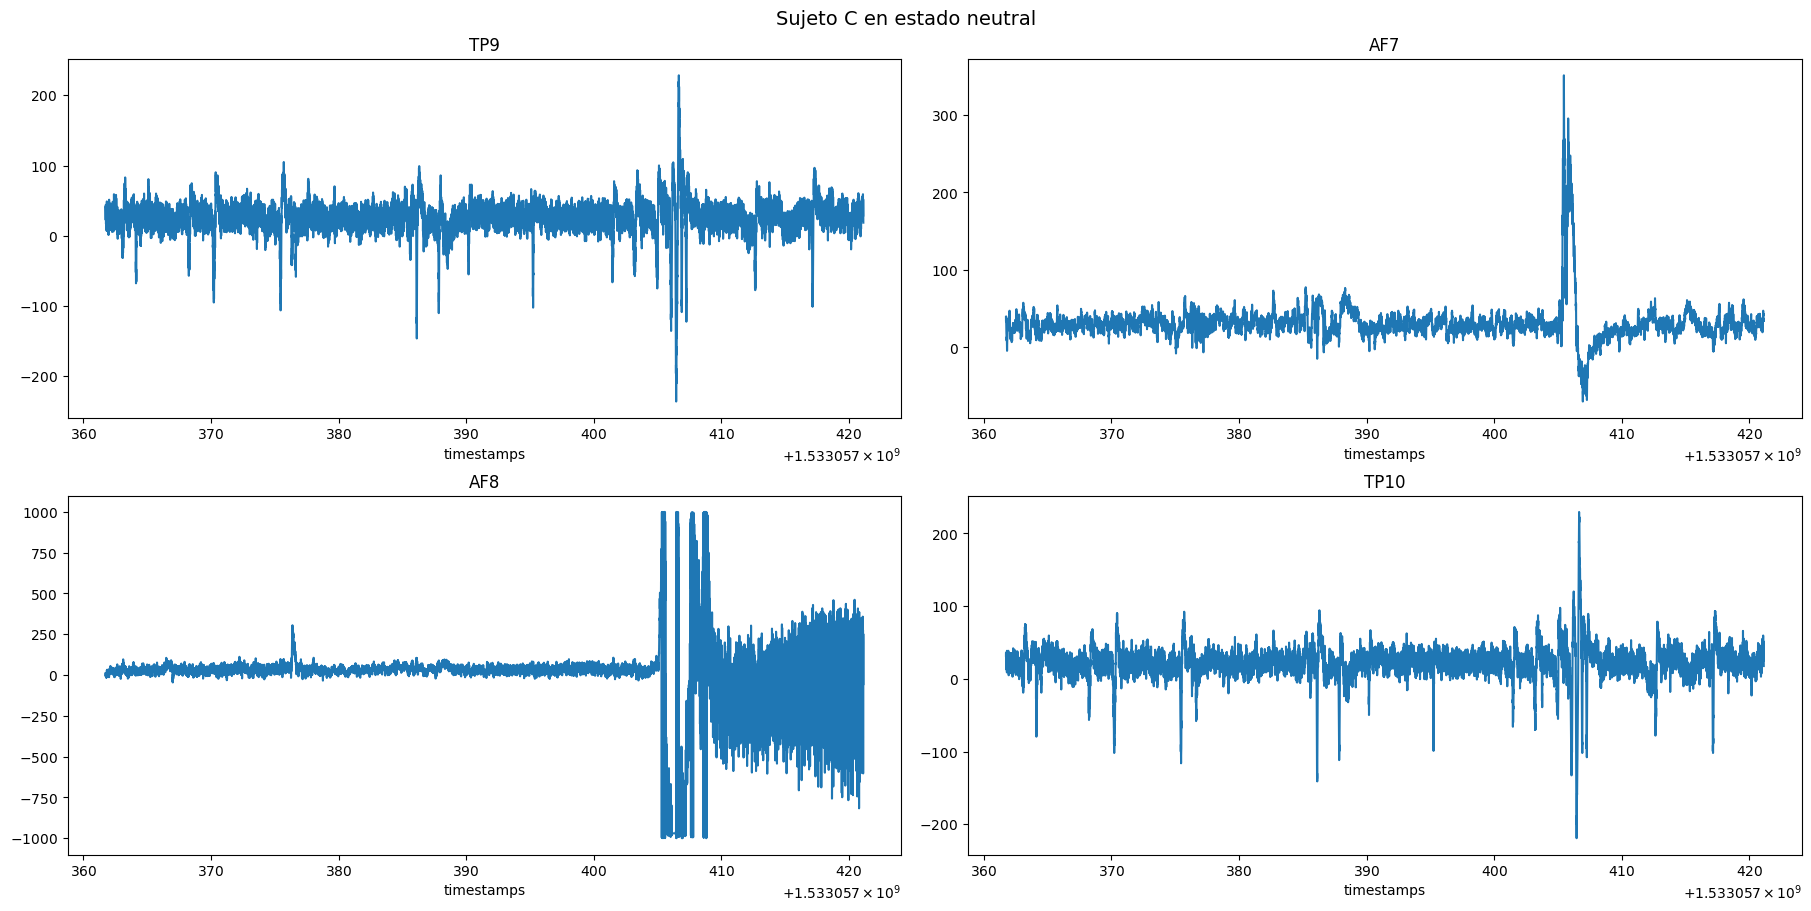

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectc-neutral-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto C en estado neutral", fontsize=14)

Text(0.5, 0.98, 'Sujeto D en estado neutral')

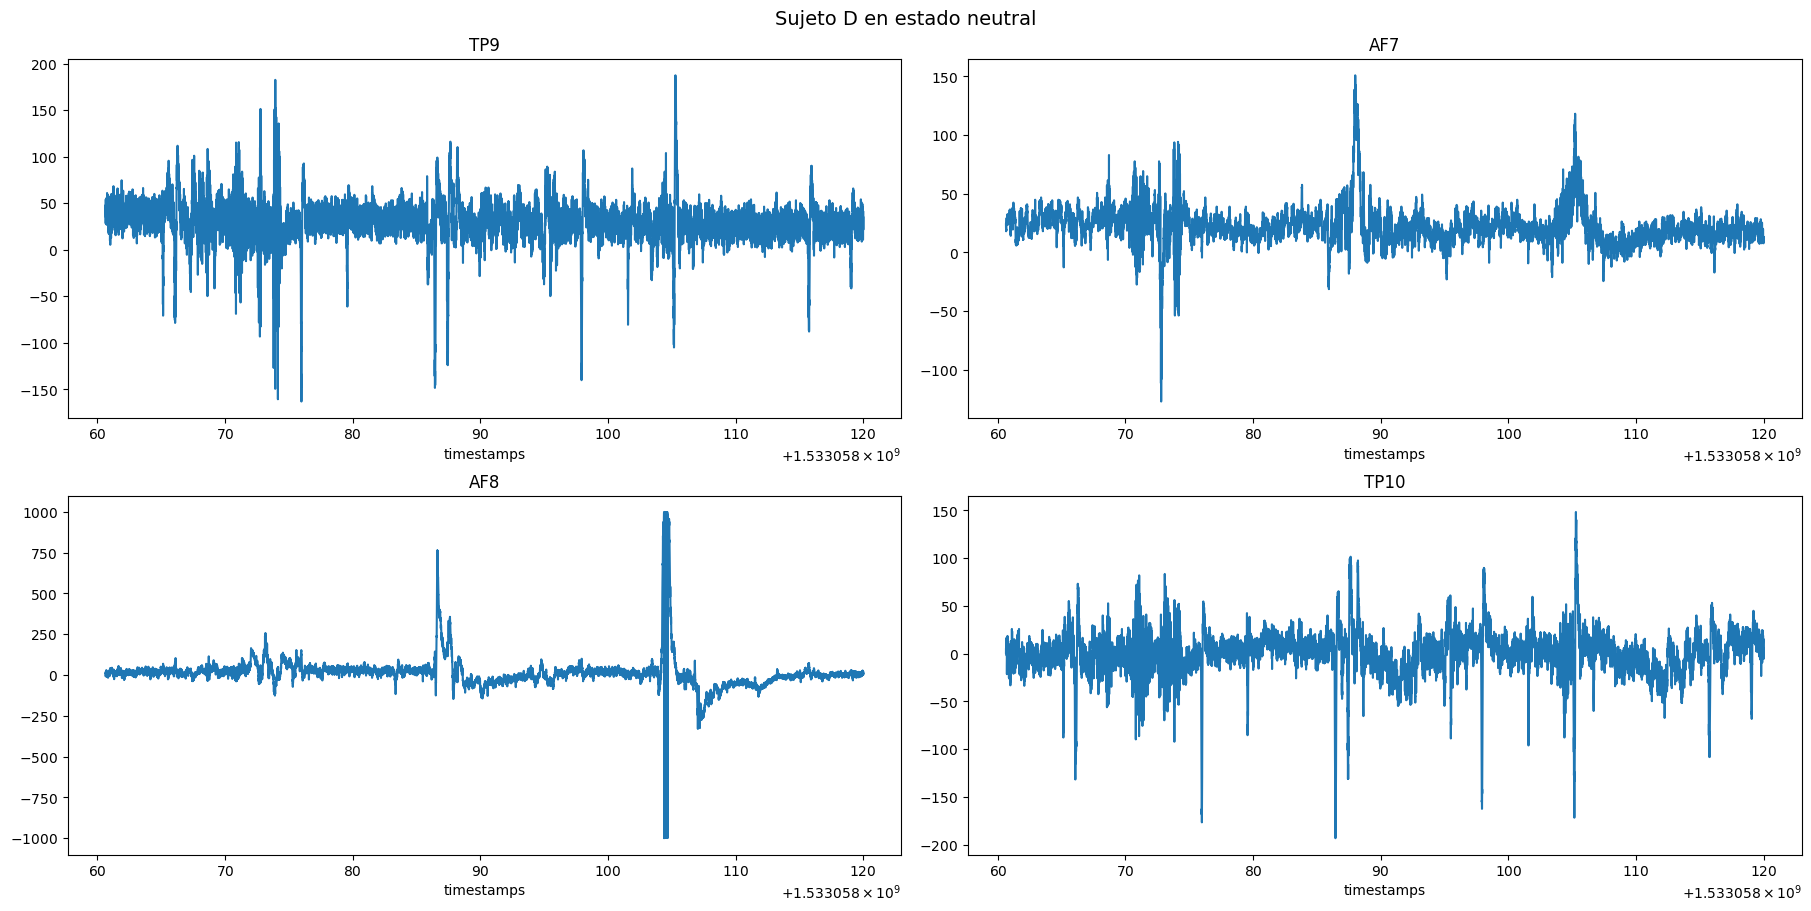

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectd-neutral-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto D en estado neutral", fontsize=14)

Text(0.5, 0.98, 'Sujeto A en estado de relajación')

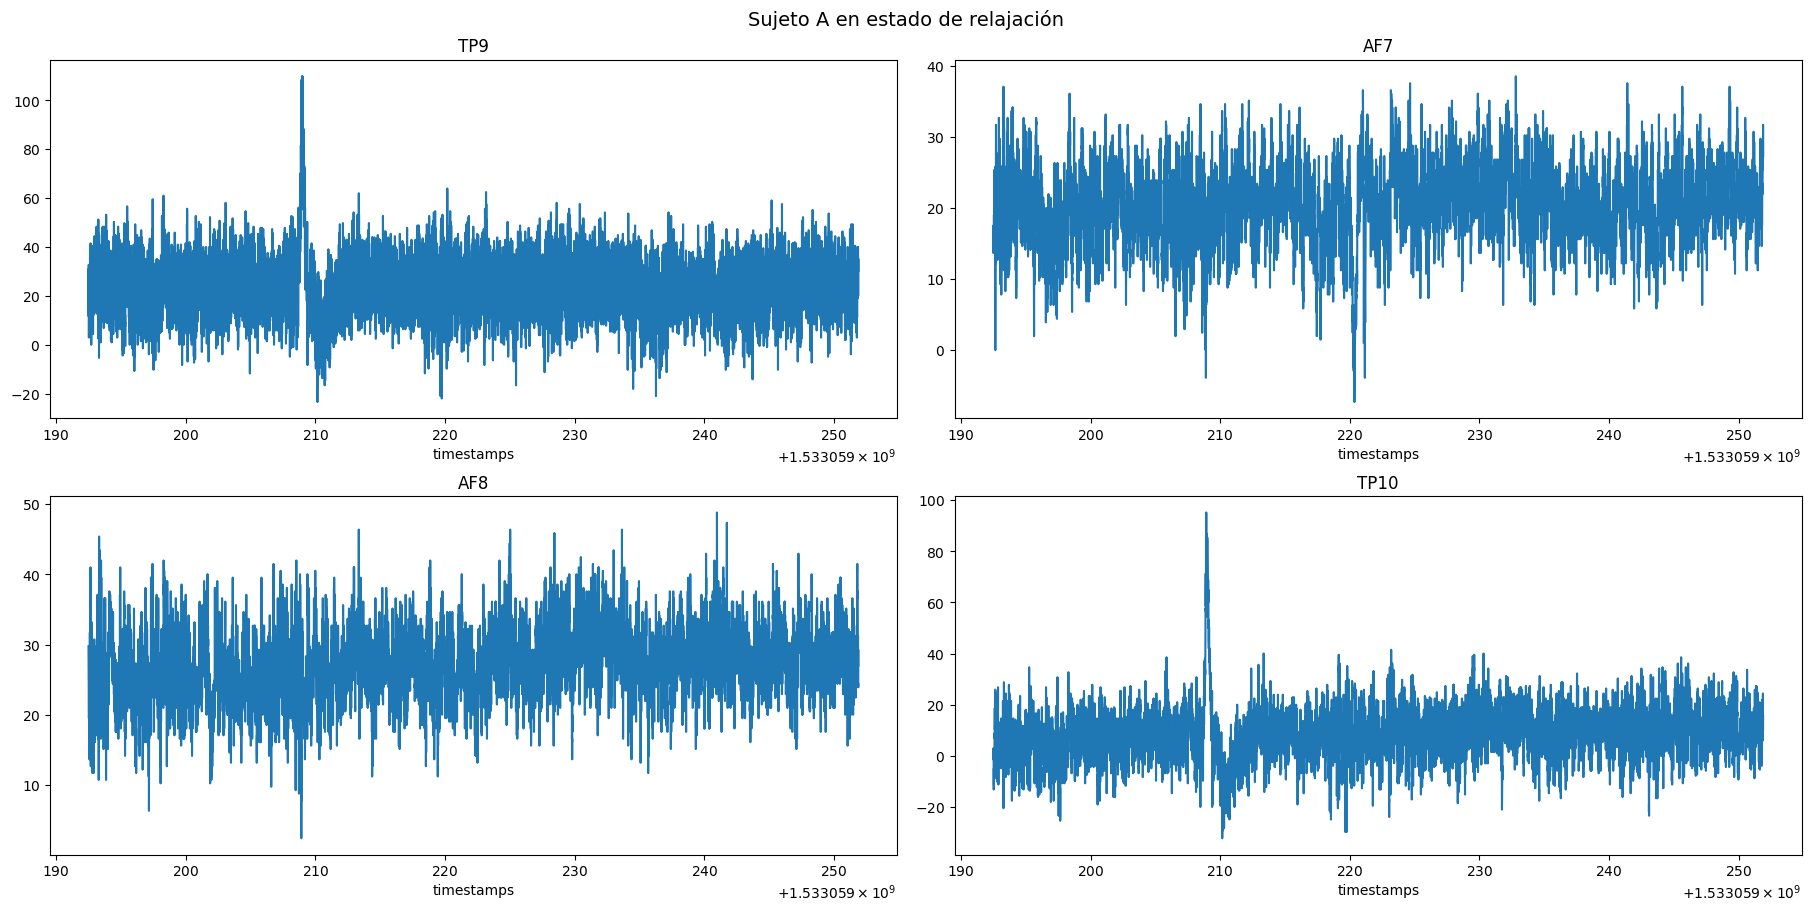

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjecta-relaxed-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto A en estado de relajación", fontsize=14)

Text(0.5, 0.98, 'Sujeto B en estado de relajación')

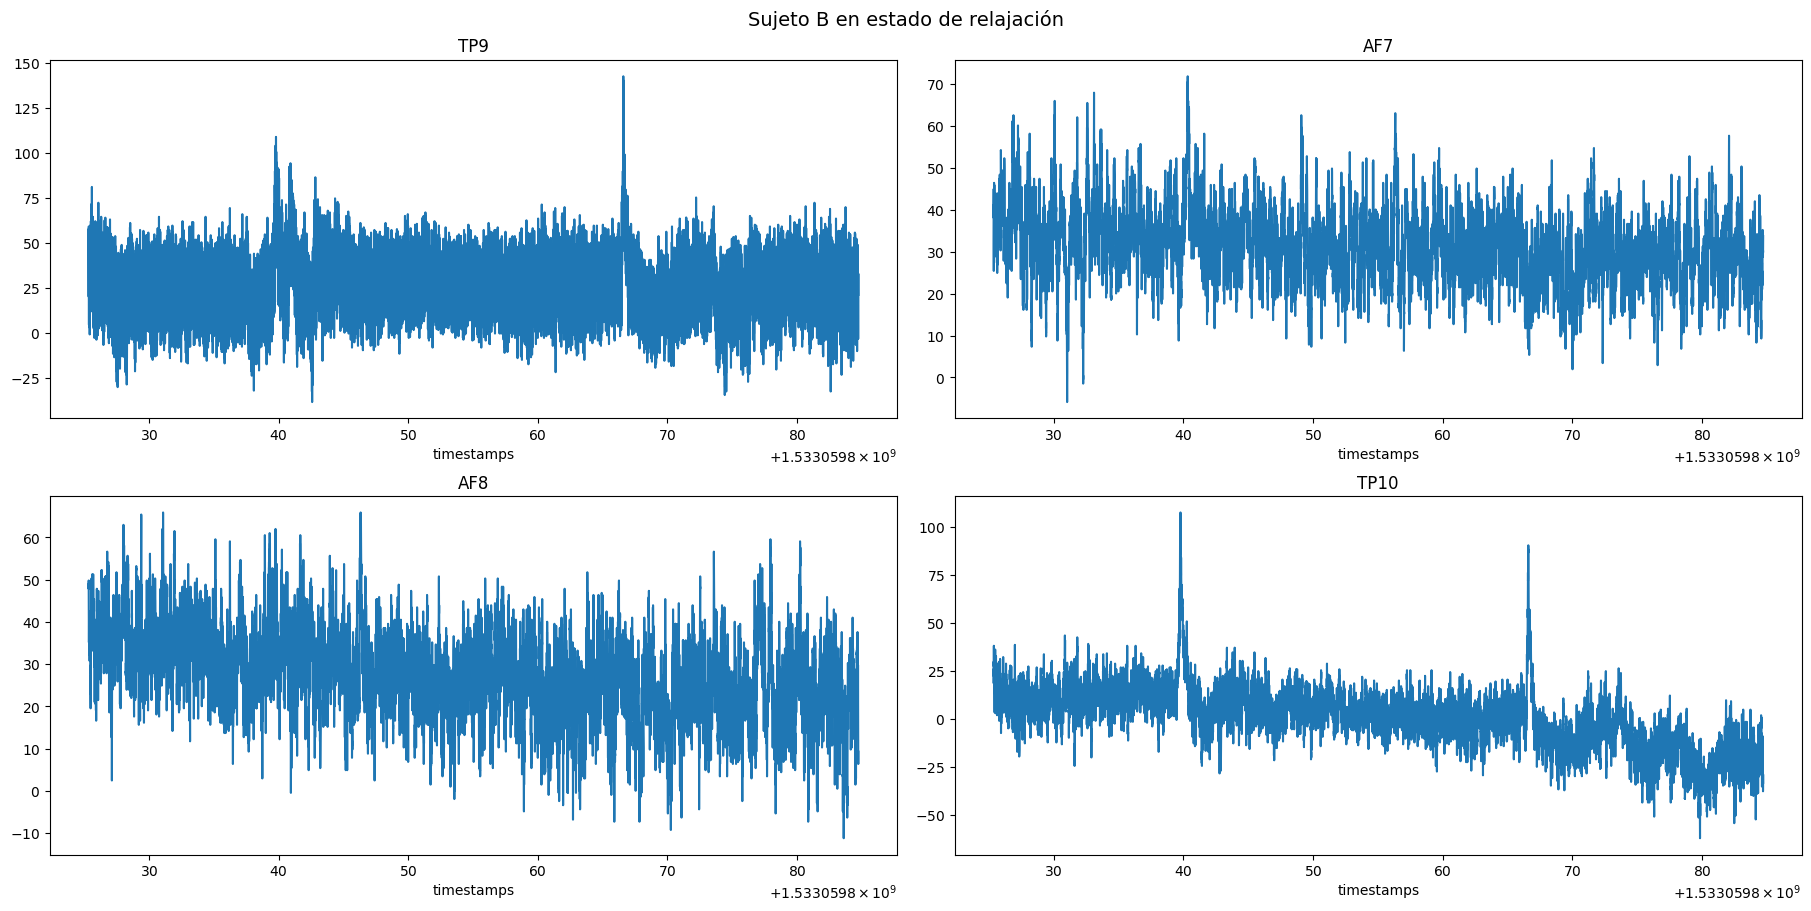

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectb-relaxed-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto B en estado de relajación", fontsize=14)

Text(0.5, 0.98, 'Sujeto C en estado de relajación')

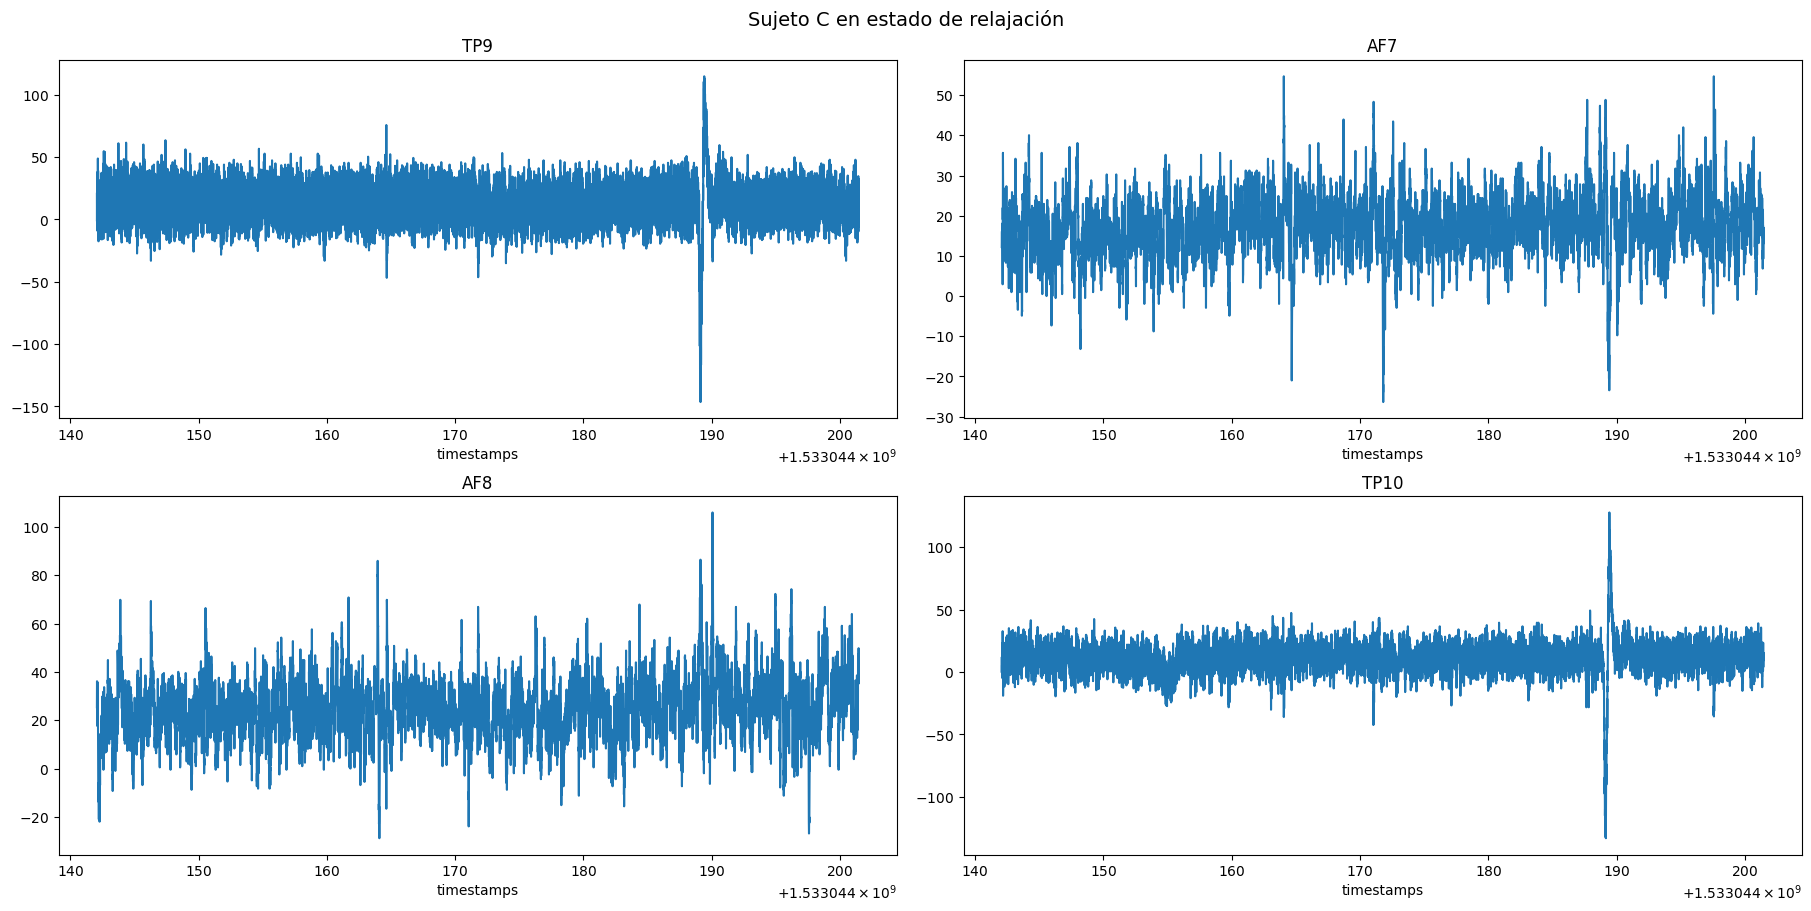

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectc-relaxed-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto C en estado de relajación", fontsize=14)

Text(0.5, 0.98, 'Sujeto D en estado de relajación')

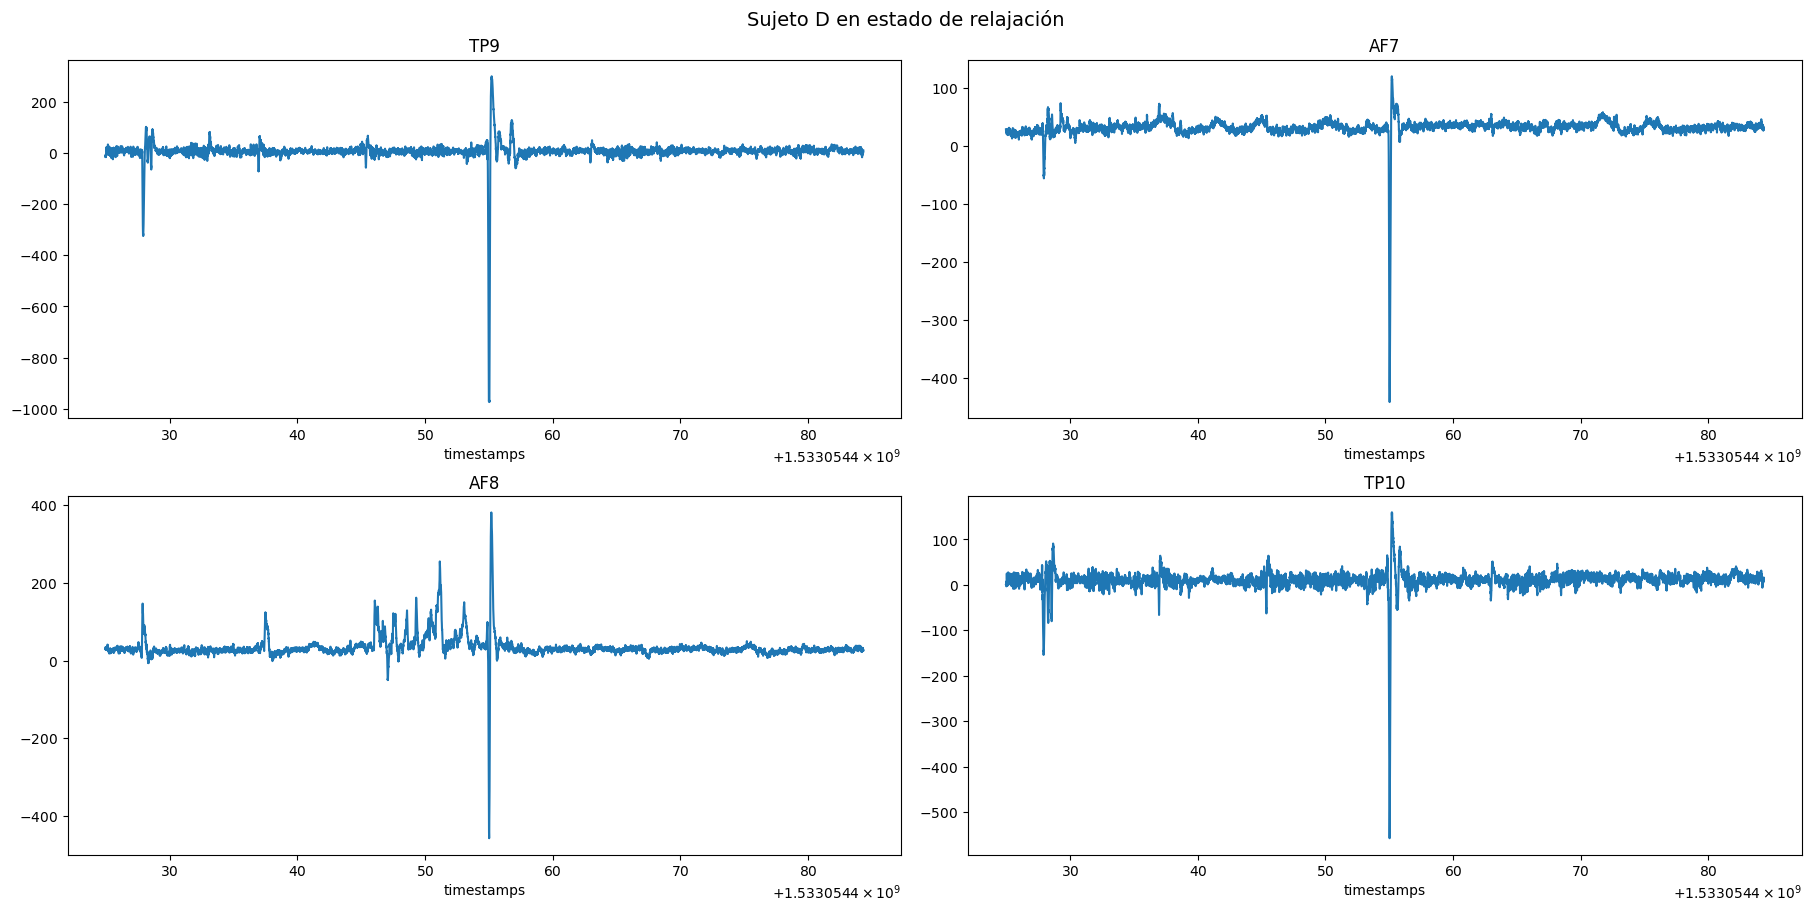

In [ ]:
data = pd.read_csv("/mnt/drive/MyDrive/DatasetEEG/subjectd-relaxed-1.csv")
data.set_index('timestamps', inplace=True)
fig1, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), layout='compressed', sharex=False)
for ax in axs1.flatten():
  ax.ticklabel_format(useMathText=True)
data['TP9'].plot(ax=axs1[0][0], title='TP9')
data['AF7'].plot(ax=axs1[0][1], title='AF7')
data['AF8'].plot(ax=axs1[1][0], title='AF8')
data['TP10'].plot(ax=axs1[1][1], title='TP10')
fig1.suptitle("Sujeto D en estado de relajación", fontsize=14)

#Signal processing and detection of significant features
The description of how the data was processed given here is largely based on the jupiter in this same folder by Dr. Luis Manso [lmanso], Aston University and reviewed by Felipe Campelo [fcampelo], Aston University (f.campelo@aston.ac.uk / fcampelo@gmail.com).




The main function that we will describe is the `feature_fft` computes the Fast Fourier Transform (FFT) of each signal in a given matrix and optionally processes and normalizes the data. It provides both the most energetic frequencies and the full power spectrum of each signal.
The code of this function can be watched below.
### Functionality

1. **Signal Matrix Input**:
    - The function takes a 2D NumPy array `matrix` with dimensions `[nsamples x nsignals]`, where each column represents a different signal sampled over a period of time.

2. **Time Period**:
    - The `period` parameter specifies the total time duration (in seconds) represented by the `matrix`.

3. **Mains Frequency Filtering**:
    - The `mains_f` parameter is the frequency of the mains power supply, typically 50 Hz or 60 Hz.
    - If `filter_mains` is set to `True`, the function will filter out the mains frequency and its immediate vicinity (plus or minus 1 Hz) from the frequency components.

4. **DC Component Removal**:
    - The `filter_DC` parameter, when set to `True`, removes the DC component (0 Hz) from the signals.

5. **Signal Normalization**:
    - The `normalise_signals` parameter, when set to `True`, normalizes the signals to the interval [-1, 1] before computing the FFT. This ensures uniform scaling across different signals.

6. **Top Frequency Components**:
    - The `ntop` parameter specifies how many of the top most energetic frequencies should be returned for each signal.

7. **Power Spectrum Option**:
    - The `get_power_spectrum` parameter, when set to `True`, returns the full power spectrum (magnitude of each frequency component) for each signal.

### Output

The function returns two items:

1. **Frequency Array**:
    - A 1D NumPy array containing the top `ntop` highest-power frequencies for each signal. If `get_power_spectrum` is `True`, this array also includes the magnitude of each frequency component for all signals.

2. **Feature Names**:
    - A list of feature names corresponding to the calculated quantities. The names associated with the power spectrum indicate the frequencies down to one decimal place.

### Processing Steps

1. **Compute Signal Properties**:
    - The number of samples `N` and the sampling period `T` are calculated based on the input matrix and the specified period.

2. **Normalization (Optional)**:
    - If normalization is requested, the signals are scaled to the interval [-1, 1].

3. **FFT Computation**:
    - The FFT is computed for each signal, and only the first half of the FFT vector is retained, as it contains all the necessary information due to the symmetry property of the FFT.

4. **Frequency Calculation**:
    - The corresponding frequencies of the FFT components are calculated.

5. **Filter DC Component (Optional)**:
    - If requested, the DC component is removed from the frequency and FFT values.

6. **Filter Mains Frequency (Optional)**:
    - If requested, the mains frequency and its vicinity are filtered out.

7. **Top Frequencies Extraction**:
    - The indices of the top `ntop` highest-power frequencies are identified and extracted.

8. **Return Values**:
    - The function compiles the top frequencies and optionally the power spectrum into the output array, and generates the corresponding feature names.

By adjusting the parameters, the function provides flexibility in analyzing the frequency components of signals, making it a versatile tool for signal processing tasks.

#### Author:
- Original: [fcampelo]
```

In [ ]:
def feature_fft(matrix, period = 1., mains_f = 50.,
				filter_mains = True, filter_DC = True,
				normalise_signals = True,
				ntop = 10, get_power_spectrum = True):
	"""
	Author:
		Original: [fcampelo]
	"""

	# Signal properties
	N   = matrix.shape[0] # number of samples
	T = period / N        # Sampling period

	# Scale all signals to interval [-1, 1] (if requested)
	if normalise_signals:
		matrix = -1 + 2 * (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))

	# Compute the (absolute values of the) FFT
	# Extract only the first half of each FFT vector, since all the information
	# is contained there (by construction the FFT returns a symmetric vector).
	fft_values = np.abs(scipy.fft.fft(matrix, axis = 0))[0:N//2] * 2 / N

	# Compute the corresponding frequencies of the FFT components
	freqs = np.linspace(0.0, 1.0 / (2.0 * T), N//2)

	# Remove DC component (if requested)
	if filter_DC:
		fft_values = fft_values[1:]
		freqs = freqs[1:]

	# Remove mains frequency component(s) (if requested)
	if filter_mains:
		indx = np.where(np.abs(freqs - mains_f) <= 1)
		fft_values = np.delete(fft_values, indx, axis = 0)
		freqs = np.delete(freqs, indx)

	# Extract top N frequencies for each signal
	indx = np.argsort(fft_values, axis = 0)[::-1]
	indx = indx[:ntop]

	ret = freqs[indx].flatten(order = 'F')

	# Make feature names
	names = []
	for i in np.arange(fft_values.shape[1]):
		names.extend(['topFreq_' + str(j) + "_" + str(i) for j in np.arange(1,11)])

	if (get_power_spectrum):
		ret = np.hstack([ret, fft_values.flatten(order = 'F')])

		for i in np.arange(fft_values.shape[1]):
			names.extend(['freq_' + "{:03d}".format(int(j)) + "_" + str(i) for j in 10 * np.round(freqs, 1)])

	return ret, names


###Example of the first 100 data after passing through the function feature_fft


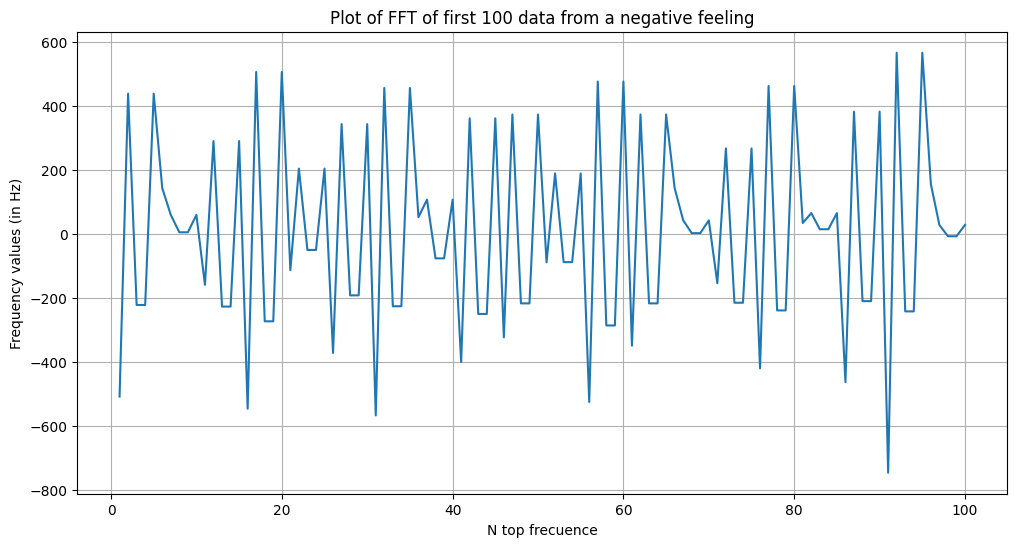

In [ ]:
import matplotlib.pyplot as plt

# Data for the y-axis imported from the csv with the data already proccesed
y_data = [
    -508, 438, -222, -222, 438, 143, 59.4, 5.05, 5.05, 59.4, -159, 290,
    -227, -227, 290, -546, 506, -273, -273, 506, -113, 204, -50.1, -50.1,
    204, -372, 343, -192, -192, 343, -567, 456, -226, -226, 456, 52.4, 107,
    -76.4, -76.4, 107, -400, 361, -250, -250, 361, -323, 373, -217, -217,
    373, -88.8, 189, -88.2, -88.2, 189, -525, 476, -286, -286, 476, -349,
    373, -217, -217, 373, 143, 42.5, 2.34, 2.34, 42.5, -154, 267, -215, -215,
    267, -420, 462, -239, -239, 462, 34.1, 65, 14.6, 14.6, 65, -463, 382,
    -210, -210, 382, -746, 566, -242, -242, 566, 156, 28, -7.27, -7.27, 28
]

# Data for the x-axis (1 to 100)
x_data = range(1, 101)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data)

# Adding titles and labels
plt.title('Plot of FFT of first 100 data from a negative feeling')
plt.xlabel('N top frecuence')
plt.ylabel('Frequency values (in Hz)')

# Display the plot
plt.grid(True)
plt.show()